In [ ]:
data <- read.csv("/Customer Acqusition.csv")

In [ ]:
data <- read.csv("/spend.csv")

In [ ]:

dataset2 <- read.csv("/spend.csv", stringsAsFactors = FALSE)

# Checking for null values
null_values_record <- list()

for (col in colnames(dataset)) {
  null_count <- sum(is.na(dataset[[col]]))
  print(paste(col, ":", null_count))
  null_values_record[[col]] <- null_count
}

null_values_record

[1] "Sl.No. : 0"
[1] "Customer : 0"
[1] "Month : 0"
[1] "Type : 0"
[1] "Amount : 0"


$Sl.No.
[1] 0

$Customer
[1] 0

$Month
[1] 0

$Type
[1] 0

$Amount
[1] 0

In [ ]:
data <- read.csv("/Repayment.csv")


In [ ]:
dataset3 <- read.csv("/Repayment.csv", stringsAsFactors = FALSE)

colnames(dataset) <- trimws(colnames(dataset))

null_values_record <- list()

for (col in colnames(dataset)) {
  null_count <- sum(is.na(dataset[[col]]))
  print(paste(col, ":", null_count))
  null_values_record[[col]] <- null_count
}

print(null_values_record)


[1] "Sl.No. : 0"
[1] "Customer : 0"
[1] "Month : 0"
[1] "Type : 0"
[1] "Amount : 0"
$Sl.No.
[1] 0

$Customer
[1] 0

$Month
[1] 0

$Type
[1] 0

$Amount
[1] 0



In [ ]:
dataset3 <- read.csv('/Repayment.csv', stringsAsFactors = FALSE)
null_values_record <- data.frame(Column = names(dataset3), Null_Count = colSums(is.na(dataset3)))
for (col in colnames(dataset3)) {
  cat(col, ":", sum(is.na(dataset3[[col]])), "\n")
}

if ("Unnamed.4" %in% colnames(dataset3)) {
  dataset3 <- subset(dataset3, select = -Unnamed.4)
}

for (col in colnames(dataset3)) {
  if (is.character(dataset3[[col]])) {
    dataset3[[col]][is.na(dataset3[[col]])] <- "Unknown"
  } else {
    dataset3[[col]][is.na(dataset3[[col]])] <- 0
  }
}
null_values_record_cleaned <- data.frame(Column = names(dataset3), Null_Count = colSums(is.na(dataset3)))


for (col in colnames(dataset3)) {
  cat(col, "(after cleaning):", sum(is.na(dataset3[[col]])), "\n")
}


SL.No. : 24 
Customer : 0 
Month : 0 
Amount : 23 
X : 1523 
SL.No. (after cleaning): 0 
Customer (after cleaning): 0 
Month (after cleaning): 0 
Amount (after cleaning): 0 
X (after cleaning): 0 


In [ ]:
# Save the cleaned dataset to a new CSV file
write.csv(dataset3, 'cleaned_repayment.csv', row.names = FALSE)


## How many distinct categories exist?


In [ ]:
dataset1 <- read.csv("/Customer Acqusition.csv")


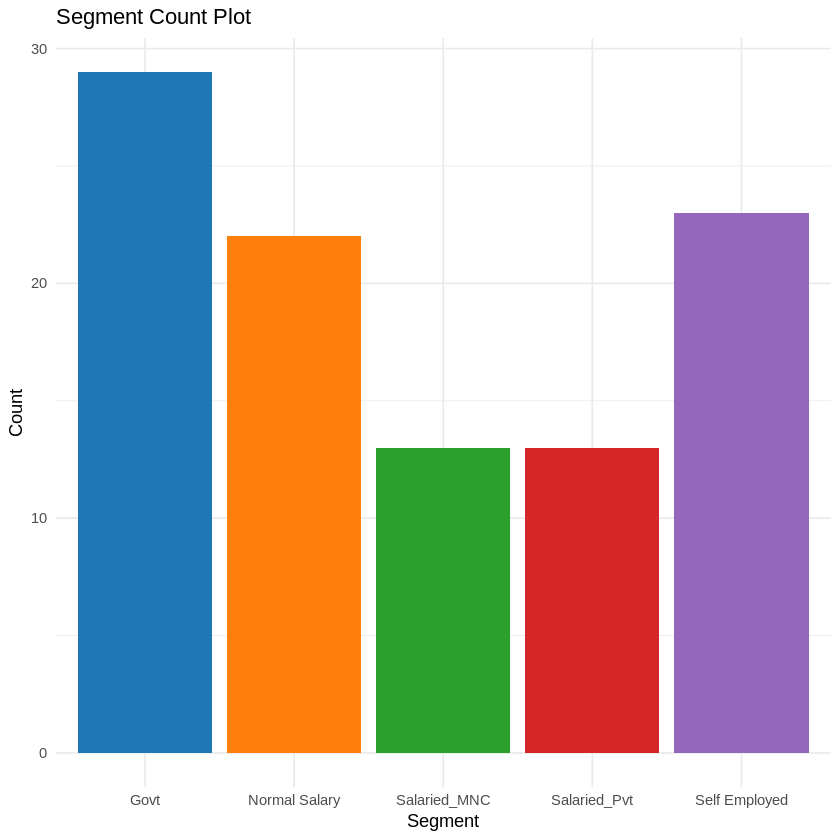

In [ ]:

library(ggplot2)

ggplot(dataset1, aes(x = Segment, fill = Segment)) +
  geom_bar() +
  scale_fill_manual(values = c('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd')) +
  theme_minimal() +
  theme(legend.position = "none") +
  labs(x = "Segment", y = "Count") +
  ggtitle("Segment Count Plot")
colnames(dataset1)[which(colnames(dataset1) == "CorrectColumnName")] <- "Segment"




## What are the top 5 product types?


In [ ]:
dataset2 <- read.csv("/spend.csv")


Warning message in file(file, "rt"):
“cannot open file '/spend.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
install.packages("dplyr")
install.packages("ggplot2")

library(dplyr)
library(ggplot2)
top_types <- dataset2 %>%
  dplyr::count(Type) %>%              # Count the occurrences of each type
  dplyr::arrange(desc(n)) %>%         # Sort by frequency
  dplyr::slice_head(n = 5)            # Select the top 5

# Create the bar plot
ggplot(top_types, aes(x = reorder(Type, -n), y = n, fill = Type)) +
  geom_bar(stat = "identity") +
  labs(x = "Type", y = "Count", title = "Top 5 Types") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_brewer(palette = "Set3")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error: object 'dataset2' not found


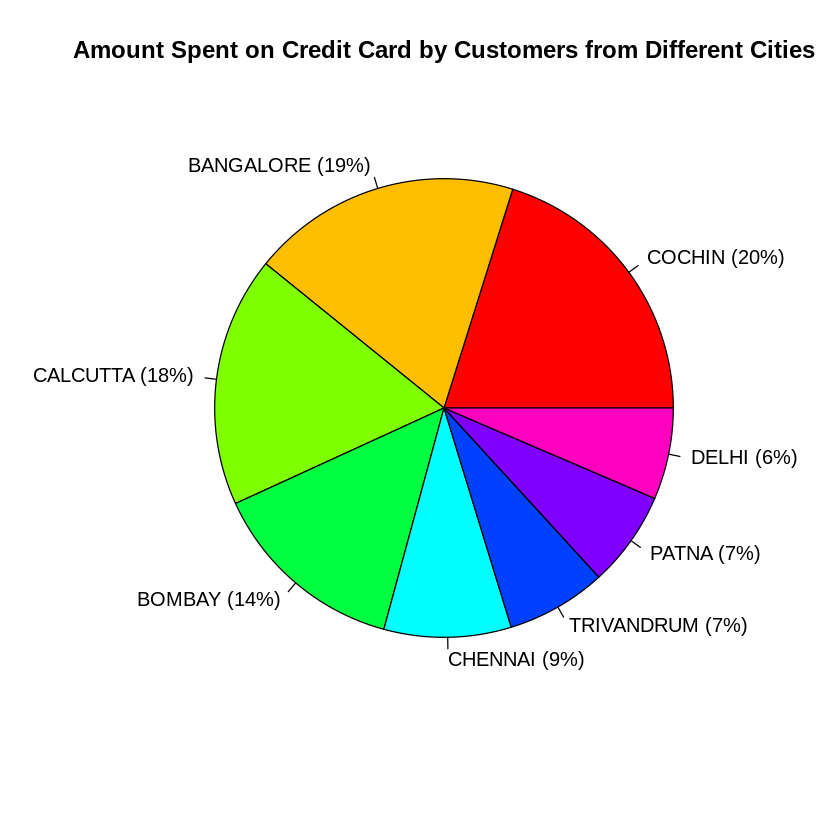

In [ ]:
library(dplyr)
library(ggplot2)

customer_spend <- merge(dataset1, dataset2, by = "Customer", all = FALSE)

city_spend <- customer_spend %>%
  group_by(City) %>%
  summarise(Total_Amount = sum(Amount)) %>%
  arrange(desc(Total_Amount))

# Create a pie chart
pie_labels <- paste0(city_spend$City, " (", round(city_spend$Total_Amount / sum(city_spend$Total_Amount) * 100), "%)")
pie(
  x = city_spend$Total_Amount,
  labels = pie_labels,
  col = rainbow(length(city_spend$City)),
  main = "Amount Spent on Credit Card by Customers from Different Cities"
)


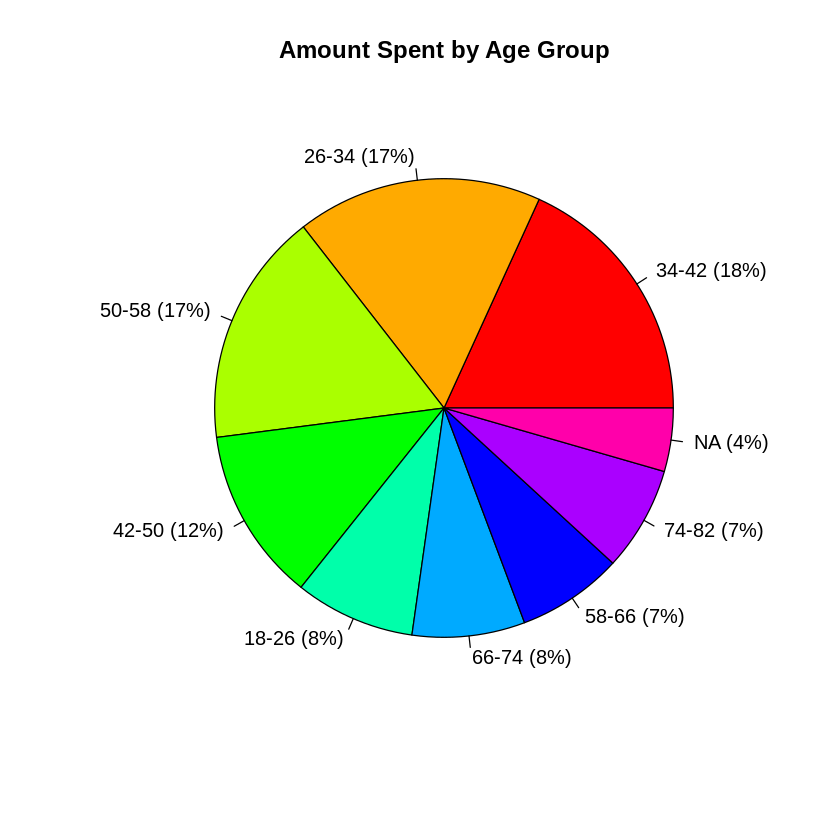

In [ ]:
library(dplyr)

bins <- seq(18, 88, by = 8)
labels <- c("18-26", "26-34", "34-42", "42-50", "50-58", "58-66", "66-74", "74-82")

customer_spend$`Age Group` <- cut(customer_spend$Age,
                                  breaks = bins,
                                  labels = labels,
                                  include.lowest = TRUE,
                                  right = FALSE)

age_spend <- customer_spend %>%
  group_by(`Age Group`) %>%
  summarise(Total_Amount = sum(Amount)) %>%
  arrange(desc(Total_Amount))

pie_labels <- paste0(age_spend$`Age Group`, " (", round(age_spend$Total_Amount / sum(age_spend$Total_Amount) * 100), "%)")
pie(
  x = age_spend$Total_Amount,
  labels = pie_labels,
  col = rainbow(length(age_spend$`Age Group`)),
  main = "Amount Spent by Age Group"
)


`summarise()` has grouped output by 'City', 'Year'. You can override using the
`.groups` argument.


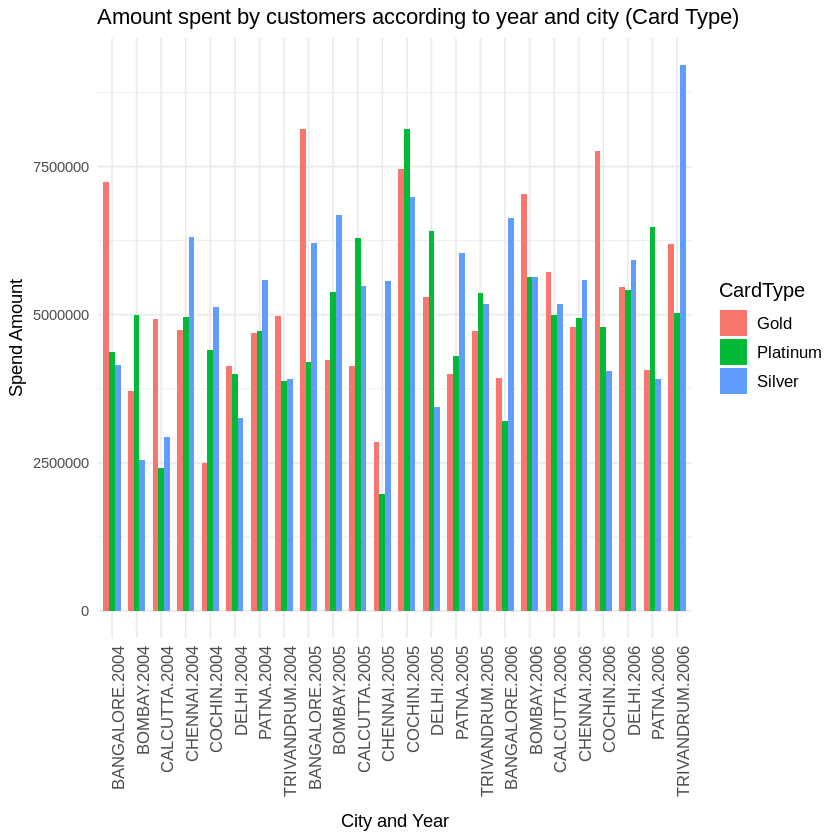

In [ ]:
library(ggplot2)
library(tidyr)
library(dplyr)

data <- read.csv("/spend.csv")

data$Year <- format(as.Date(data$Month, format = "%d-%b-%y"), "%Y")


set.seed(123)
cities <- c("BANGALORE", "BOMBAY", "CALCUTTA", "CHENNAI", "DELHI", "PATNA", "COCHIN", "TRIVANDRUM")
data$City <- sample(cities, nrow(data), replace = TRUE)

card_types <- c("Gold", "Platinum", "Silver")
data$CardType <- sample(card_types, nrow(data), replace = TRUE)

aggregated_data <- data %>%
  group_by(City, Year, CardType) %>%
  summarize(Amount = sum(Amount, na.rm = TRUE)) %>%
  ungroup()

ggplot(aggregated_data, aes(x = interaction(City, Year), y = Amount, fill = CardType)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  theme_minimal() +
  labs(
    x = "City and Year",
    y = "Spend Amount",
    title = "Amount spent by customers according to year and city (Card Type)"
  ) +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 10),  # Rotate x-axis labels
    axis.title.x = element_text(margin = margin(t = 10)),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )


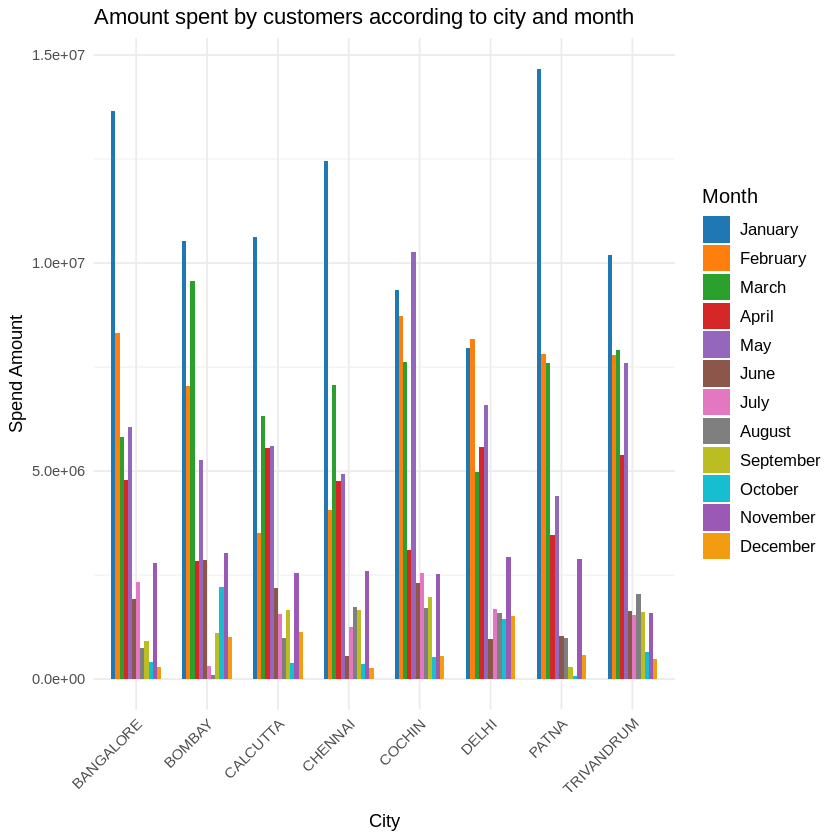

In [ ]:
library(ggplot2)
library(dplyr)
data <- read.csv("/spend.csv")
data$Month <- factor(format(as.Date(data$Month, format = "%d-%b-%y"), "%B"), levels = month.name, ordered = TRUE)
if (!"City" %in% colnames(data)) {
  set.seed(123)
  data$City <- sample(c("BANGALORE", "BOMBAY", "CALCUTTA", "CHENNAI", "DELHI", "PATNA", "COCHIN", "TRIVANDRUM"),nrow(data), replace = TRUE)
}
aggregated_data <- data %>%
  group_by(City, Month) %>%
  summarise(Amount = sum(Amount, na.rm = TRUE), .groups = "drop")
month_colors <- setNames(c(
  "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
  "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#9b59b6", "#f39c12"),
  month.name)
ggplot(aggregated_data, aes(x = City, y = Amount, fill = Month)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  scale_fill_manual(values = month_colors) +
  theme_minimal() +
  labs(x = "City", y = "Spend Amount", title = "Amount spent by customers according to city and month") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
    axis.title.x = element_text(margin = margin(t = 10)),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )


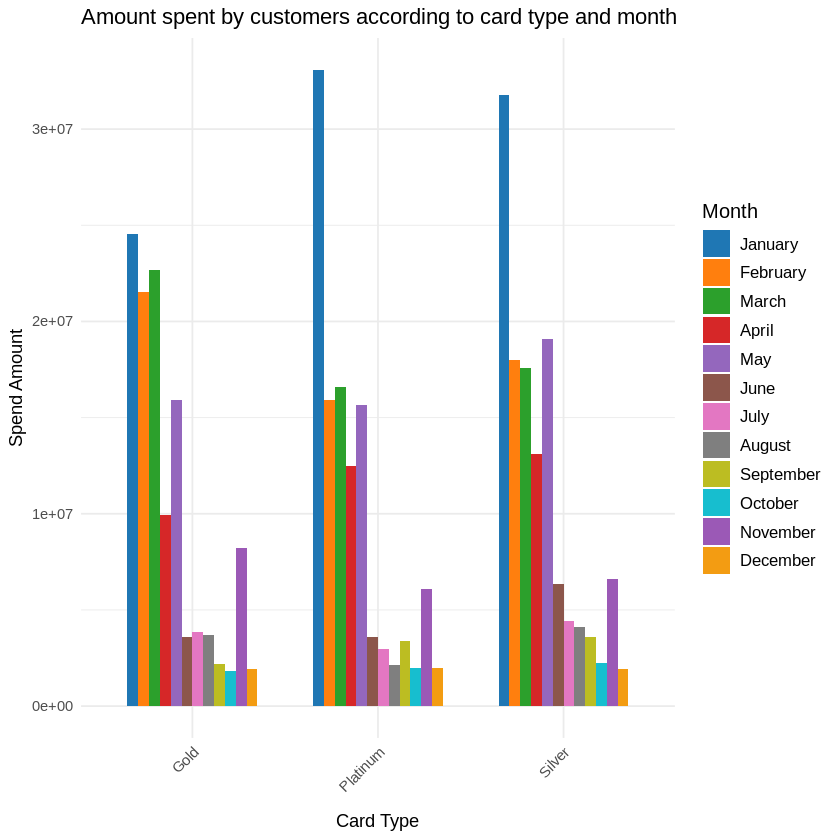

In [ ]:
library(ggplot2)
library(dplyr)
data <- read.csv("/spend.csv")

data$Month <- factor(format(as.Date(data$Month, format = "%d-%b-%y"), "%B"),
                     levels = month.name, ordered = TRUE)

if (!"CardType" %in% colnames(data)) {
  set.seed(123)
  data$CardType <- sample(c("Gold", "Platinum", "Silver"),
                          nrow(data), replace = TRUE)
}
aggregated_data <- data %>%
  group_by(CardType, Month) %>%
  summarise(Amount = sum(Amount, na.rm = TRUE), .groups = "drop")


month_colors <- setNames(c(
  "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
  "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#9b59b6", "#f39c12"),
  month.name)
ggplot(aggregated_data, aes(x = CardType, y = Amount, fill = Month)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  scale_fill_manual(values = month_colors) +
  theme_minimal() +
  labs(x = "Card Type", y = "Spend Amount", title = "Amount spent by customers according to card type and month") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
    axis.title.x = element_text(margin = margin(t = 10)),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )
